# Applying sentiment analysis to your social network

# Español

## Step 1: Extract Data

In [2]:
import tweepy
from tweepy import OAuthHandler
import csv
from textblob import TextBlob

import twitterCredentials

In [3]:
api_key = twitterCredentials.api_key
api_secret = twitterCredentials.api_secret
access_token = twitterCredentials.access_token
access_secret = twitterCredentials.access_secret

auth = OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [33]:
timeline = api.user_timeline(id="CNNEE", count=50 )

with open('CNNEE.csv', 'w', newline='', encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Date", "Day", "Tweet", "Retweets", "Likes"])
    
    for tweet in timeline:
        b = TextBlob(tweet.text)

        if b.detect_language() == 'es':
            print(tweet.text)
            data = [tweet.created_at.date().strftime("%b %d %Y "), tweet.created_at.date().strftime("%b %d"), tweet.text, tweet.retweet_count, tweet.favorite_count]
            writer.writerow(data)
        

Estatuas de Cristóbal Colón están siendo vandalizadas y derribadas en Estados Unidos, ¿por qué? https://t.co/Sa4ky7QRHy
¿Podría este dispositivo detener la propagación de virus en los aviones? https://t.co/QBbIrr8Fxk https://t.co/V1TITFeRgr
Río de Janeiro y Sao Paulo reabren los centros comerciales https://t.co/SlnKjpK5xp https://t.co/zK3AkJJZd0
Un rapero británico comparte video en el que su padre recibe una descarga eléctrica de la policía https://t.co/Ey4Bkyc2Mp
Este condado de Nueva Jersey, EE.UU., disolvió su policía en 2012 y formó una nueva https://t.co/rSzoyAFK3D
América Latina sigue registrando altos números de contagios y muertes por coronavirus. A pesar de que varios países… https://t.co/V9I9QQYAvN
La Nascar prohíbe la bandera confederada en sus eventos https://t.co/S7BYRN2qxv
Existe el envejecimiento primario y secundario del sistema inmune, según el doctor Mauricio González Arias del New… https://t.co/VR4jWCgCJ1
La vitamina D habría sacado a pacientes del estado crítico po

URLError: <urlopen error [WinError 10060] Se produjo un error durante el intento de conexión ya que la parte conectada no respondió adecuadamente tras un periodo de tiempo, o bien se produjo un error en la conexión establecida ya que el host conectado no ha podido responder>

## Step 2: Load Data

In [34]:
import pandas as pd

import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

%matplotlib inline

In [43]:
datos_csv = pd.read_csv('CNNEE.csv')
datos_csv.head()

,Date,Day,Tweet,Retweets,Likes
0,Jun 11 2020,Jun 11,Estatuas de Cristóbal Colón están siendo vanda...,17,75
1,Jun 11 2020,Jun 11,¿Podría este dispositivo detener la propagació...,4,41
2,Jun 11 2020,Jun 11,Río de Janeiro y Sao Paulo reabren los centros...,14,26
3,Jun 11 2020,Jun 11,Un rapero británico comparte video en el que s...,24,69
4,Jun 11 2020,Jun 11,"Este condado de Nueva Jersey, EE.UU., disolvió...",13,44


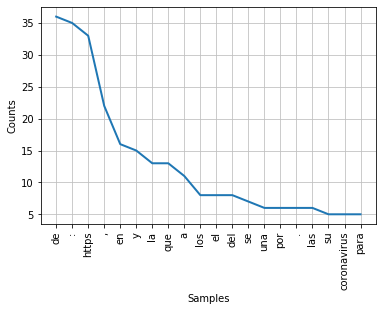

In [44]:
Post = ""
for data in datos_csv['Tweet']:
    Post += data
    
freq = FreqDist(word_tokenize(Post))
freq.plot(20)

## Step 3: Clean Data

In [45]:
import emoji
import re

from nltk.corpus import stopwords
import string

In [46]:
stopwordList = stopwords.words("Spanish")
stopwordList

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [47]:
punctuationList = list(string.punctuation)
punctuationList

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [48]:
stopwordsList = stopwordList + punctuationList + ['“','”','¡','¿',"''",'``','...','→','⬥','…'] + stopwords.words("English")
stopwordsList

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [49]:
Post

'Estatuas de Cristóbal Colón están siendo vandalizadas y derribadas en Estados Unidos, ¿por qué? https://t.co/Sa4ky7QRHy¿Podría este dispositivo detener la propagación de virus en los aviones? https://t.co/QBbIrr8Fxk https://t.co/V1TITFeRgrRío de Janeiro y Sao Paulo reabren los centros comerciales https://t.co/SlnKjpK5xp https://t.co/zK3AkJJZd0Un rapero británico comparte video en el que su padre recibe una descarga eléctrica de la policía https://t.co/Ey4Bkyc2MpEste condado de Nueva Jersey, EE.UU., disolvió su policía en 2012 y formó una nueva https://t.co/rSzoyAFK3DAmérica Latina sigue registrando altos números de contagios y muertes por coronavirus. A pesar de que varios países… https://t.co/V9I9QQYAvNLa Nascar prohíbe la bandera confederada en sus eventos https://t.co/S7BYRN2qxvExiste el envejecimiento primario y secundario del sistema inmune, según el doctor Mauricio González Arias del New… https://t.co/VR4jWCgCJ1La vitamina D habría sacado a pacientes del estado crítico por covid

In [50]:
def clean_tweets_emoji(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    
    return clean_text

In [51]:
tweets_clean_emoji = clean_tweets_emoji(Post)
tweets_clean_emoji

'Estatuas de Cristóbal Colón están siendo vandalizadas y derribadas en Estados Unidos, ¿por qué? https://t.co/Sa4ky7QRHy¿Podría este dispositivo detener la propagación de virus en los aviones? https://t.co/QBbIrr8Fxk https://t.co/V1TITFeRgrRío de Janeiro y Sao Paulo reabren los centros comerciales https://t.co/SlnKjpK5xp https://t.co/zK3AkJJZd0Un rapero británico comparte video en el que su padre recibe una descarga eléctrica de la policía https://t.co/Ey4Bkyc2MpEste condado de Nueva Jersey, EE.UU., disolvió su policía en 2012 y formó una nueva https://t.co/rSzoyAFK3DAmérica Latina sigue registrando altos números de contagios y muertes por coronavirus. A pesar de que varios países… https://t.co/V9I9QQYAvNLa Nascar prohíbe la bandera confederada en sus eventos https://t.co/S7BYRN2qxvExiste el envejecimiento primario y secundario del sistema inmune, según el doctor Mauricio González Arias del New… https://t.co/VR4jWCgCJ1La vitamina D habría sacado a pacientes del estado crítico por covid

In [52]:
def clean_tweets_regex(text):
    tweet = re.sub(r'@[a-zA-Z0-9-_.]+', '', text)
    tweet = re.sub(r'#[a-zA-Z0-9-_.]+', '', tweet)
    tweet = re.sub(r'//[a-zA-Z0-9-_.]+', '', tweet)
    tweet = re.sub(r'https://[a-zA-Z0-9-_./]+', '', tweet)
    tweet = re.sub(r'https:[a-zA-Z0-9-_./]+', '', tweet)
    tweet = re.sub(r'www.[a-zA-Z0-9-_./]+', '', tweet)
    tweet = re.sub(r'[a-zA-Z0-9-./]+[…]', '', tweet)
    tweet = re.sub(r'[ ]+[…]', '', tweet)
    tweet = re.sub('\n|\r', '', tweet)
    tweet = re.sub(r'[á|ä|â|à]', 'a', tweet)
    tweet = re.sub(r'[é|ê|è]', 'e', tweet)
    tweet = re.sub(r'[í|î|ì]', 'i', tweet)
    tweet = re.sub(r'[ó|ô|ò]', 'o', tweet)
    tweet = re.sub(r'[ú|û|ù|ü]', 'u', tweet)
    tweet = re.sub(r'RT ', '', tweet)
    return tweet

In [53]:
tweets_clean = clean_tweets_regex(tweets_clean_emoji)
tweets_clean

'Estatuas de Cristobal Colon estan siendo vandalizadas y derribadas en Estados Unidos, ¿por que? ¿Podria este dispositivo detener la propagacion de virus en los aviones?  io de Janeiro y Sao Paulo reabren los centros comerciales   rapero britanico comparte video en el que su padre recibe una descarga electrica de la policia  condado de Nueva Jersey, EE.UU., disolvio su policia en 2012 y formo una nueva erica Latina sigue registrando altos numeros de contagios y muertes por coronavirus. A pesar de que varios pai  Nascar prohibe la bandera confederada en sus eventos  el envejecimiento primario y secundario del sistema inmune, segun el doctor Mauricio Gonzalez Arias del   vitamina D habria sacado a pacientes del estado critico por covid-19  compañia de suministros medicos dijo el martes que descarto los productos que habia fabricado durante la   campaña del presidente Donald Trump le exigio a CNN que se retracte y se disculpe por una encuesta reciente   rebasa los 2 millones de casos de c

In [54]:
filtro = [palabra for palabra in word_tokenize(tweets_clean) if palabra not in stopwordsList]
filtro

['Estatuas',
 'Cristobal',
 'Colon',
 'estan',
 'siendo',
 'vandalizadas',
 'derribadas',
 'Estados',
 'Unidos',
 '¿por',
 '¿Podria',
 'dispositivo',
 'detener',
 'propagacion',
 'virus',
 'aviones',
 'io',
 'Janeiro',
 'Sao',
 'Paulo',
 'reabren',
 'centros',
 'comerciales',
 'rapero',
 'britanico',
 'comparte',
 'video',
 'padre',
 'recibe',
 'descarga',
 'electrica',
 'policia',
 'condado',
 'Nueva',
 'Jersey',
 'EE.UU.',
 'disolvio',
 'policia',
 '2012',
 'formo',
 'nueva',
 'erica',
 'Latina',
 'sigue',
 'registrando',
 'altos',
 'numeros',
 'contagios',
 'muertes',
 'coronavirus',
 'A',
 'pesar',
 'varios',
 'pai',
 'Nascar',
 'prohibe',
 'bandera',
 'confederada',
 'eventos',
 'envejecimiento',
 'primario',
 'secundario',
 'sistema',
 'inmune',
 'segun',
 'doctor',
 'Mauricio',
 'Gonzalez',
 'Arias',
 'vitamina',
 'D',
 'habria',
 'sacado',
 'pacientes',
 'critico',
 'covid-19',
 'compañia',
 'suministros',
 'medicos',
 'dijo',
 'martes',
 'descarto',
 'productos',
 'habia',
 'f

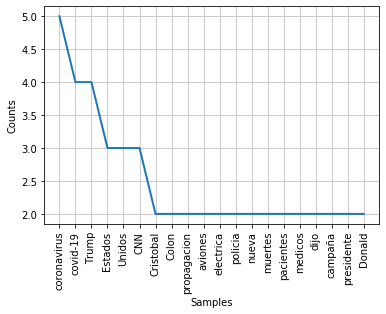

In [55]:
freq = FreqDist(filtro)
freq.plot(20)

## Step 4: Process Data

In [56]:
from nltk.classify import NaiveBayesClassifier

In [86]:
datos_excel = pd.read_excel(open('taggedTweets.xlsx','rb'))
datos_excel = pd.DataFrame(datos_excel)
sample = datos_excel.sample(len(datos_excel))
sample

,Tweet,Retweets,Favoritos,Sentimiento
713,"Pasos para inscribirte en la #UNA, recuerda qu...",30,17,neu
172,Autoridades y comunidad de la UCLA lamentan el...,26,9,neg
285,RT @VTVcanal8: ANC abrió camino para enjuiciar...,52,0,neg
266,Rechazamos la pretensión por el Departamento d...,11,7,neg
481,RT @prolecsuna: Desde el PROLECS- UNA y el vic...,4,0,neu
...,...,...,...,...
574,@c65castello Buenas tardes... En las tardes en...,0,1,neu
4,RT @EfemerideDelDia: #UnDiaComoHoy #13J de 195...,14,0,neg
735,#Repost @Abejaarr with @kimcy929_repost\n• • •...,1,2,neu
768,Unet y San Cristóbal Fútbol Club firmaron acta...,0,0,neu


In [58]:
def construirBolsaDePalabras(palabras):
    diccionario={}
    for palabra in word_tokenize(palabras):
        if palabra not in stopwordsList:
            diccionario[palabra]=1
    return diccionario

In [59]:
rasgosNegativos = []
rasgosPositivos = []
rasgosNeutrales = []
    
for indice_fila, fila in sample.iterrows():
    tweet_clean = clean_tweets_emoji(fila['Tweet'])
    tweet_clean = clean_tweets_regex(tweet_clean)
    if fila['Sentimiento'] == 'pos':
        rasgosPositivos.append((construirBolsaDePalabras(tweet_clean),fila['Sentimiento']))
    elif fila['Sentimiento'] == 'neu':
        rasgosNeutrales.append((construirBolsaDePalabras(tweet_clean),fila['Sentimiento']))
    else:
        rasgosNegativos.append((construirBolsaDePalabras(tweet_clean),fila['Sentimiento']))

In [60]:
len(rasgosPositivos)

454

In [61]:
rasgosPositivos[5]

({'UNET': 1, 'realiza': 1, 'curso': 1, 'intensivo': 1, 'intrasemestral': 1},
 'pos')

In [62]:
divP=int(len(rasgosPositivos)*0.95)
divNeu=int(len(rasgosNeutrales)*0.95)
divNeg=int(len(rasgosNegativos)*0.95)
clasificadorSentimiento=NaiveBayesClassifier.train(rasgosPositivos[:divP]+rasgosNegativos[:divNeg]+rasgosNeutrales[:divNeu])

In [63]:
nltk.classify.util.accuracy(clasificadorSentimiento,rasgosPositivos[:divP]+rasgosNegativos[:divNeg]+rasgosNeutrales[:divNeu])

0.9466357308584686

In [64]:
nltk.classify.util.accuracy(clasificadorSentimiento,rasgosPositivos[divP:]+rasgosNegativos[divNeg:]+rasgosNeutrales[divNeu:])

0.6956521739130435

In [65]:
clasificadorSentimiento.show_most_informative_features()

Most Informative Features
                    UCLA = 1                 neg : neu    =     17.4 : 1.0
             Autoridades = 1                 neg : pos    =     17.0 : 1.0
                  invita = 1                 neu : neg    =     14.3 : 1.0
                    pais = 1                 neg : pos    =     11.0 : 1.0
                 Pruebas = 1                 neu : neg    =     11.0 : 1.0
               Venezuela = 1                 neg : pos    =     10.4 : 1.0
                Ciencias = 1                 neg : neu    =     10.3 : 1.0
                  inicia = 1                 pos : neg    =      9.7 : 1.0
                    toda = 1                 neu : neg    =      9.0 : 1.0
                    años = 1                 pos : neu    =      9.0 : 1.0


In [66]:
tweet = "¿El peor solo de guitarra de la historia? Burlas a Nick Jonas por su interpretación"

print(tweet)
tweet_clean = clean_tweets_emoji(tweet)
tweet_clean = clean_tweets_regex(tweet_clean)
bolsa=construirBolsaDePalabras(tweet_clean)
print(bolsa)

¿El peor solo de guitarra de la historia? Burlas a Nick Jonas por su interpretación
{'¿El': 1, 'peor': 1, 'solo': 1, 'guitarra': 1, 'historia': 1, 'Burlas': 1, 'Nick': 1, 'Jonas': 1, 'interpretacion': 1}


In [67]:
clasificadorSentimiento.classify(bolsa)

'neg'

In [68]:
datos_csv = pd.read_csv('CNNEE.csv')
datos_csv

,Date,Day,Tweet,Retweets,Likes
0,Jun 11 2020,Jun 11,Estatuas de Cristóbal Colón están siendo vanda...,17,75
1,Jun 11 2020,Jun 11,¿Podría este dispositivo detener la propagació...,4,41
2,Jun 11 2020,Jun 11,Río de Janeiro y Sao Paulo reabren los centros...,14,26
3,Jun 11 2020,Jun 11,Un rapero británico comparte video en el que s...,24,69
4,Jun 11 2020,Jun 11,"Este condado de Nueva Jersey, EE.UU., disolvió...",13,44
5,Jun 11 2020,Jun 11,América Latina sigue registrando altos números...,62,96
6,Jun 11 2020,Jun 11,La Nascar prohíbe la bandera confederada en su...,10,67
7,Jun 11 2020,Jun 11,Existe el envejecimiento primario y secundario...,18,36
8,Jun 11 2020,Jun 11,La vitamina D habría sacado a pacientes del es...,283,546
9,Jun 11 2020,Jun 11,Una compañía de suministros médicos dijo el ma...,17,58


In [69]:
positive = []
neutral = []
negative = []

In [71]:
with open('CNNEEDataTag.csv', 'w', newline='', encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Tweet","Sentimiento"])
    
    for indice_fila, fila in datos_csv.iterrows():
        print(fila[2])
        tweet_clean = clean_tweets_emoji(fila[2])
        tweet_clean = clean_tweets_regex(tweet_clean)
        bolsa=construirBolsaDePalabras(tweet_clean)
        sent = clasificadorSentimiento.classify(bolsa)
        print("\033[0;31;40m "+sent+" \033[0m")
        writer.writerow([fila[2],sent])
        if sent == 'pos':
            positive.append(fila[2])
        elif sent == 'neu':
            neutral.append(fila[2])
        else:
            negative.append(fila[2])
        

Estatuas de Cristóbal Colón están siendo vandalizadas y derribadas en Estados Unidos, ¿por qué? https://t.co/Sa4ky7QRHy
 neg 
¿Podría este dispositivo detener la propagación de virus en los aviones? https://t.co/QBbIrr8Fxk https://t.co/V1TITFeRgr
 neg 
Río de Janeiro y Sao Paulo reabren los centros comerciales https://t.co/SlnKjpK5xp https://t.co/zK3AkJJZd0
 neg 
Un rapero británico comparte video en el que su padre recibe una descarga eléctrica de la policía https://t.co/Ey4Bkyc2Mp
 neg 
Este condado de Nueva Jersey, EE.UU., disolvió su policía en 2012 y formó una nueva https://t.co/rSzoyAFK3D
 neg 
América Latina sigue registrando altos números de contagios y muertes por coronavirus. A pesar de que varios países… https://t.co/V9I9QQYAvN
 neg 
La Nascar prohíbe la bandera confederada en sus eventos https://t.co/S7BYRN2qxv
 neg 
Existe el envejecimiento primario y secundario del sistema inmune, según el doctor Mauricio González Arias del New… https://t.co/VR4jWCgCJ1
 neg 
La vitamina D

## Step 5: Show Data

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt

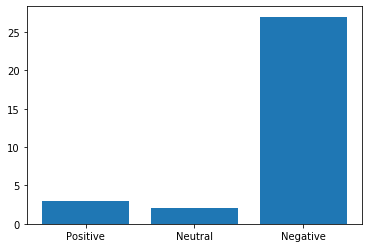

In [73]:
fig = plt.figure(u'Gráfica de barras')
ax = fig.add_subplot(111)

nombres = ['Positive','Neutral','Negative']
datos = [len(positive),len(neutral),len(negative)]
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(nombres)

plt.show()

### Bonus

In [74]:
from wordcloud import WordCloud

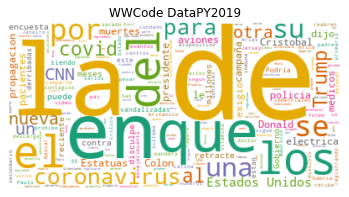

In [75]:
wordcloud = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate(tweets_clean)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WWCode DataPY2019")
plt.show()

# English

## Step 1: Extract Data

### Twitter

In [76]:
timeline = api.user_timeline(id="elonmusk", count=50 )

with open('elonmusk.csv', 'w', newline='', encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Date", "Day", "Tweet", "Retweets", "Likes"])
    
    for tweet in timeline:
        print(tweet.text)
        data = [tweet.created_at.date().strftime("%b %d %Y "), tweet.created_at.date().strftime("%b %d"), tweet.text, tweet.retweet_count, tweet.favorite_count]
        writer.writerow(data)

@justpaulinelol @engineers_feed As foretold by https://t.co/LJJCD7BAgX
@engineers_feed Stonks
lol
@Erdayastronaut @i_gvf @SciGuySpace Exactly. Chartering a dedicated 747 flight around the world costs less than buy… https://t.co/61lRA0YF5v
@tobyliiiiiiiiii @physorg_com @nature @SciReports True
@olenamuliarchuk @mrkylefield @cleantechnica Battery industry is world champion at bs. “Lithium-ion” doesn’t really… https://t.co/x1KaxmHixK
@physorg_com @nature @SciReports I thought this was an Onion article
@blue_bnd @olenamuliarchuk @PPathole @mrkylefield @cleantechnica Staggeringly dumb
@PPathole @mrkylefield @cleantechnica I got the fuel cell question about 8000 times
@rhodanazanin1 @ABC7 @NBCLA @CBSLA It’s getting Biblical
@mrkylefield @cleantechnica Exactly, fuel cells = fool sells
@realAnishPai Renewable energy passed coal in April https://t.co/1kRCyGXfN9
@TeslaTruckClub Worth considering
@pandabfr @Ophiltry Agreed
@Ophiltry Trèy Boucher
Catapults are a great way to get somewhere fast htt

###  Facebook

In [7]:
from facebook_scraper import get_posts

In [77]:
for post in get_posts('djangogirlsbogota', pages=1):
    print(post['text'])

SAT, NOV 24, 2018
Taller de Programación para Mujeres Bogotá
ARGENTINAENPYTHON.COM
Taller Django Girls en Cali
Django Girls Colombia
April 24, 2018 at 10:00 PM ·
¡Queremos animar a más mujeres a dominar la web!
Es por eso que desde Django Girls Colombia y Python Cali con el apoyo de Argentina en Python, Python Colombia y Python Software Foundation estamos organizando un taller en el cual podrás construir tu propio sitio web desde cero en un día. Además, vamos a utilizar todas las herramientas que programadores profesionales utilizan diariamente. ¡Y de una manera muy sencilla!
Para poder participar de este taller, debes inscribirte en la página oficial del evento http://miprimeraweb.org siguiendo el enlace "¡Quiero inscribirme!" y esperar un email de confirmación el día indicado en la página del evento ya que los cupos son limitados.
El taller es totalmente ¡GRATUITO!, anímate a disfrutar de esta oportunidad e inscríbete.
Plazo para inscripciones hasta el 12 de Mayo.
Aclaración: haciend

## Step 4: Process Data

In [78]:
csv_data = pd.read_csv('elonmusk.csv')
csv_data

,Date,Day,Tweet,Retweets,Likes
0,Jun 11 2020,Jun 11,@justpaulinelol @engineers_feed As foretold by...,145,4529
1,Jun 11 2020,Jun 11,@engineers_feed Stonks,1967,23439
2,Jun 11 2020,Jun 11,lol,24878,202003
3,Jun 11 2020,Jun 11,@Erdayastronaut @i_gvf @SciGuySpace Exactly. C...,112,1747
4,Jun 11 2020,Jun 11,@tobyliiiiiiiiii @physorg_com @nature @SciRepo...,20,504
5,Jun 11 2020,Jun 11,@olenamuliarchuk @mrkylefield @cleantechnica B...,51,598
6,Jun 11 2020,Jun 11,@physorg_com @nature @SciReports I thought thi...,112,3416
7,Jun 11 2020,Jun 11,@blue_bnd @olenamuliarchuk @PPathole @mrkylefi...,22,418
8,Jun 11 2020,Jun 11,@PPathole @mrkylefield @cleantechnica I got th...,32,529
9,Jun 11 2020,Jun 11,@rhodanazanin1 @ABC7 @NBCLA @CBSLA It’s gettin...,46,523


In [79]:
popularity_list = []
num_list = []
num = 1

for tweet in csv_data['Tweet']:
    print(tweet)
    
    analysis = TextBlob(tweet)
    analysis = analysis.sentiment
    print(analysis)
    popularity = analysis.polarity
    popularity_list.append(popularity)
    num_list.append(num)
    num = num + 1

@justpaulinelol @engineers_feed As foretold by https://t.co/LJJCD7BAgX
Sentiment(polarity=0.0, subjectivity=0.0)
@engineers_feed Stonks
Sentiment(polarity=0.0, subjectivity=0.0)
lol
Sentiment(polarity=0.8, subjectivity=0.7)
@Erdayastronaut @i_gvf @SciGuySpace Exactly. Chartering a dedicated 747 flight around the world costs less than buy… https://t.co/61lRA0YF5v
Sentiment(polarity=0.04166666666666667, subjectivity=0.15833333333333333)
@tobyliiiiiiiiii @physorg_com @nature @SciReports True
Sentiment(polarity=0.35, subjectivity=0.65)
@olenamuliarchuk @mrkylefield @cleantechnica Battery industry is world champion at bs. “Lithium-ion” doesn’t really… https://t.co/x1KaxmHixK
Sentiment(polarity=0.0, subjectivity=0.0)
@physorg_com @nature @SciReports I thought this was an Onion article
Sentiment(polarity=0.0, subjectivity=0.0)
@blue_bnd @olenamuliarchuk @PPathole @mrkylefield @cleantechnica Staggeringly dumb
Sentiment(polarity=-0.375, subjectivity=0.5)
@PPathole @mrkylefield @cleantechnica I 

## Step 5: ShowData

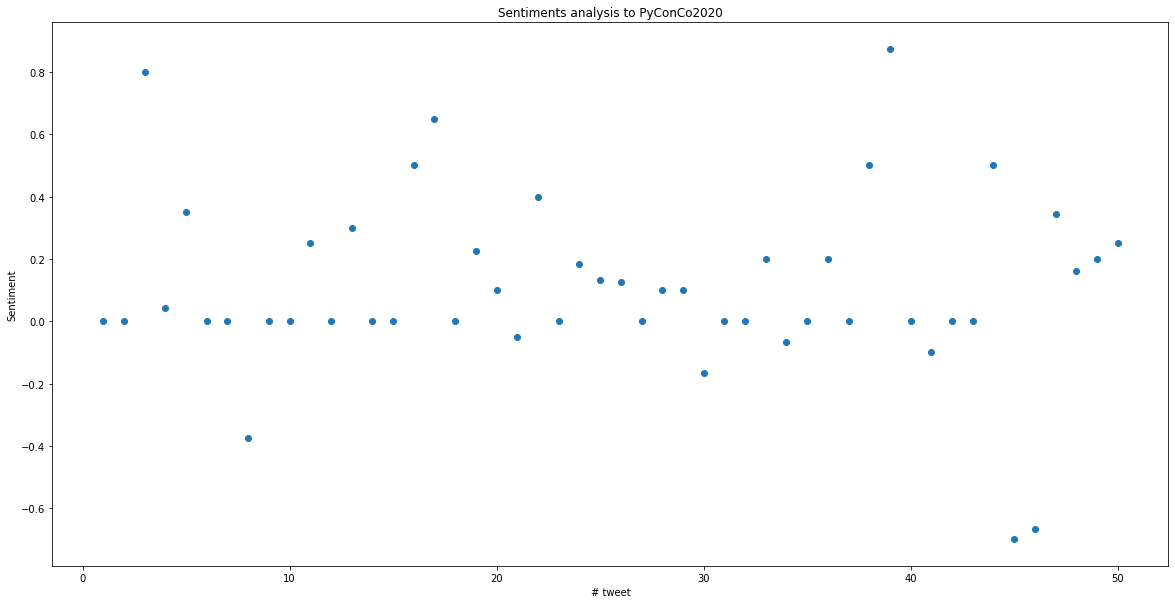

In [81]:
plt.figure(figsize=(20,10))
plt.scatter(num_list, popularity_list)
#plt.scatter(excel_data['Day'], popularity_list)
plt.title("Sentiments analysis to PyConCo2020")
plt.xlabel("# tweet")
plt.ylabel("Sentiment")
plt.show()